Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [53]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [54]:
ds = pd.read_csv('Salary_Data.csv')
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Exploratory Data Analysis

In [55]:
ds.shape

(30, 2)

In [56]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [57]:
ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

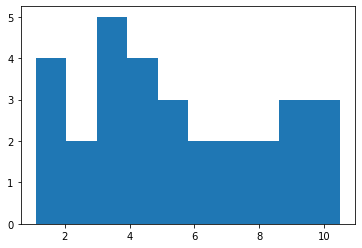

In [58]:
plt.hist(ds.YearsExperience)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

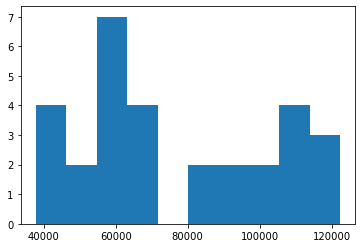

In [59]:
plt.hist(ds.Salary)

Text(0, 0.5, 'Salary')

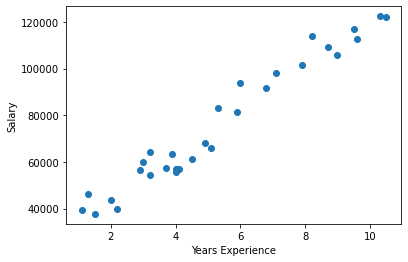

In [60]:
plt.scatter(ds.YearsExperience,ds.Salary)
plt.xlabel('Years Experience')
plt.ylabel('Salary')

In [61]:
ds.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

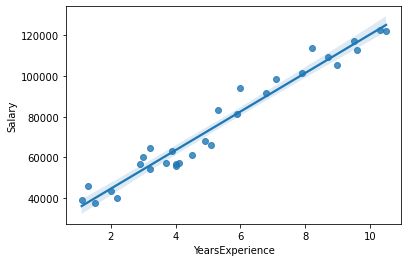

In [62]:
sns.regplot(ds.YearsExperience,ds.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e00d031a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e00d031610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e00d031640>],
 'medians': [<matplotlib.lines.Line2D at 0x1e00ca1cca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e00ca1c850>],
 'means': []}

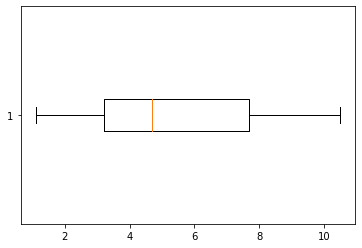

In [63]:
plt.boxplot(ds.YearsExperience,vert=False)

<AxesSubplot:xlabel='Salary'>

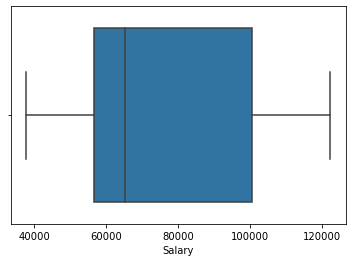

In [64]:
sns.boxplot(ds.Salary)

### Model Building

In [65]:
model = smf.ols('Salary~YearsExperience', ds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.14e-20
Time:                        22:11:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model_pred = model.predict(ds.YearsExperience)
model_pred.head(5)

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [25]:
rmse_val = np.sqrt(np.mean((np.array(ds.Salary)-np.array(model_pred))**2))
rmse_val

5592.043608760662

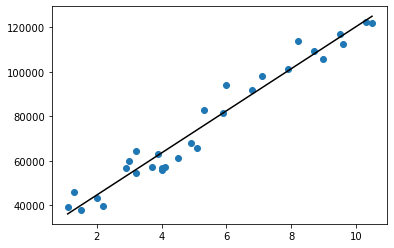

In [67]:
plt.scatter(ds.YearsExperience, ds.Salary)
plt.plot(ds.YearsExperience, model_pred, color='black') # black line is predicted data

### Improving Accuracy --  Using Transformations

#### Using log transformations

In [68]:
model_log = smf.ols('Salary~YearsExperience', ds).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.14e-20
Time:                        22:11:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
log_pred = model_log.predict(ds.YearsExperience)
log_pred.head(5)

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [70]:
rmse_log = np.sqrt(np.mean((np.array(ds.Salary)-np.array(log_pred))**2))
rmse_log

5592.043608760662

#### Using exponential transformation

In [71]:
model_exp = smf.ols('np.log(Salary)~YearsExperience',ds).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 03 May 2022   Prob (F-statistic):           7.03e-18
Time:                        22:12:00   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model_pred_exp = model_exp.predict()
model_pred_exp

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])

In [73]:
exp_pred = np.exp(model_pred_exp)
exp_pred

array([ 41998.95746835,  43066.06679373,  44160.28922813,  47019.02918883,
        48213.68847426,  52639.1424722 ,  53303.67538648,  54658.01493467,
        54658.01493467,  58196.33078806,  59674.98290303,  60428.33845625,
        60428.33845625,  61191.20460439,  64340.19929147,  67651.24614934,
        69370.12871194,  71132.68463508,  76693.63077985,  77661.83503955,
        85860.70420802,  89153.72539326,  98565.80959149, 102346.11051167,
       108971.54075808, 113150.93336398, 120475.81960119, 121996.74383626,
       133194.6213443 , 136578.82969363])

In [74]:
rmse_exp = np.sqrt(np.mean((np.array(ds.Salary)-np.array(exp_pred))**2))
rmse_exp

7213.23507662009

Text(0, 0.5, 'Delivery Time')

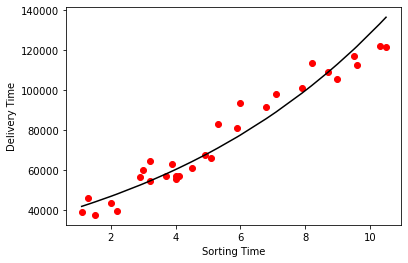

In [75]:
plt.scatter(ds.YearsExperience, ds.Salary, color='red')
plt.plot(ds.YearsExperience, exp_pred, color='black') # black line is predicted data
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

#### Using quad transformations

In [76]:
ds['Exp_sqr'] = ds.YearsExperience * ds.YearsExperience
ds.head(4)

,YearsExperience,Salary,Exp_sqr
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00


In [77]:
second_column = ds.pop('Exp_sqr')
ds.insert(1, 'Exp_sqr' ,second_column)
ds.head(4)

,YearsExperience,Exp_sqr,Salary
0,1.1,1.21,39343.0
1,1.3,1.69,46205.0
2,1.5,2.25,37731.0
3,2.0,4.00,43525.0


In [78]:
model_quad = smf.ols('np.log(Salary)~YearsExperience+Exp_sqr', ds).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 03 May 2022   Prob (F-statistic):           3.95e-18
Time:                        22:13:44   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience     0.2024      0.027      7.601      0.000       0.148       0.257
Exp_sqr            -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model_pred_quad = model_quad.predict(ds)
model_pred_quad.head(4)

0    10.551469
1    10.588771
2    10.625544
3    10.715161
dtype: float64

In [82]:
#taking exp again as we have taken log of salary
quad_pred = np.exp(model_pred_quad)
quad_pred.head(4)

0    38233.559684
1    39686.674746
2    41173.227466
3    45033.440973
dtype: float64

In [86]:
rmse_quad = np.sqrt(np.mean((np.array(ds.Salary)-np.array(quad_pred))**2))
rmse_quad

5391.081582693588

Text(0, 0.5, 'Delivery Time')

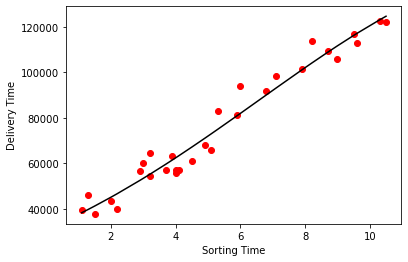

In [84]:
plt.scatter(ds.YearsExperience, ds.Salary, color='red')
plt.plot(ds.YearsExperience, quad_pred, color='black') # black line is predicted data
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [85]:
final_data = pd.DataFrame()
final_data['Model'] = pd.Series(['statsmodel','Log model','exp model','quad model'])
final_data['RMSE Values'] = pd.Series([rmse_val,rmse_log,rmse_exp,rmse_quad])
final_data['Rsquare'] = pd.Series([model.rsquared,model_log.rsquared,model_exp.rsquared,model_quad.rsquared])

final_data

,Model,RMSE Values,Rsquare
0,statsmodel,5592.043609,0.956957
1,Log model,5592.043609,0.956957
2,exp model,7213.235077,0.931967
3,quad model,5391.081583,0.948611


### Model Validation

1. mean value of standardized residuals should be zero
2. residuals should have constant variance

Text(0.5, 0.98, 'OLS Model')

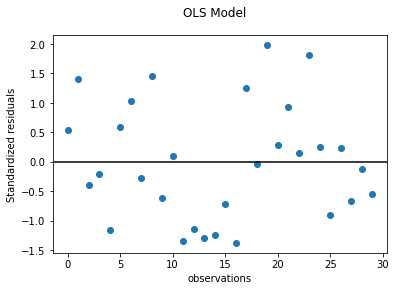

In [88]:
plt.plot(model.resid_pearson,'o')
plt.axhline(y=0, color='black')
plt.xlabel('observations')
plt.ylabel('Standardized residuals')
plt.suptitle('Simple OLS Model')

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <BarContainer object of 10 artists>)

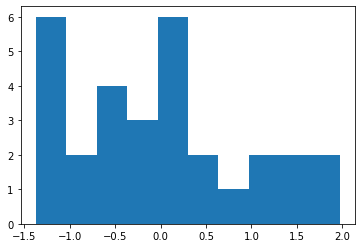

In [91]:
plt.hist(model.resid_pearson)

Text(0.5, 0.98, 'Quad Model')

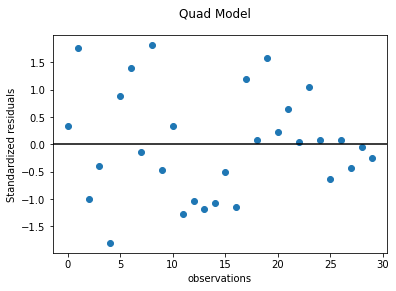

In [90]:
plt.plot(model_quad.resid_pearson,'o')
plt.axhline(y=0, color='black')
plt.xlabel('observations')
plt.ylabel('Standardized residuals')
plt.suptitle('Quad Model')

(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-1.80253896, -1.44129045, -1.08004195, -0.71879344, -0.35754493,
         0.00370357,  0.36495208,  0.72620059,  1.08744909,  1.4486976 ,
         1.8099461 ]),
 <BarContainer object of 10 artists>)

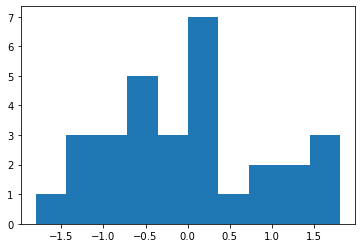

In [92]:
plt.hist(model_quad.resid_pearson)

### Predicting values -- using quad model

chosen quad model coz rmse value is least for it

In [94]:
final_df = ds.copy()
final_df['Predicted Salary'] = quad_pred
final_df

,YearsExperience,Exp_sqr,Salary,Predicted Salary
0,1.1,1.21,39343.0,38233.559684
1,1.3,1.69,46205.0,39686.674746
2,1.5,2.25,37731.0,41173.227466
3,2.0,4.00,43525.0,45033.440973
4,2.2,4.84,39891.0,46633.832589
5,2.9,8.41,56642.0,52477.426306
6,3.0,9.00,60150.0,53341.747319
7,3.2,10.24,54445.0,55091.465477
8,3.2,10.24,64445.0,55091.465477
9,3.7,13.69,57189.0,59582.917523
